[Link download of the dataset](https://www.kaggle.com/datasets/uciml/glass?resource=download) --Glass Classification

In [ ]:
## upload the file (work place satisfaction)
from google.colab import files
upload = files.upload()

Saving archive (2).zip to archive (2).zip


*The stucture we applied here is to following all the requirements in order*




**Part 1** - Familiarization and Basic Testing of the kNN Algorithm


1.   **--> Dataset Selection**
2.   *Algorithm Application*
3.   *Use Case Identification*



In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import matplotlib.pyplot as plt

df = pd.read_csv('archive (2).zip') ## you don't need to decompess the file

print("Dataset Shape:", df.shape)
print("First 5 rows of the dataset:")
df.head()

Dataset Shape: (214, 10)
First 5 rows of the dataset:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
## check for any missing values
print("Missing values in each column:")
df.isnull().sum().sum()

Missing values in each column:


0

In [23]:
## check for duplicate values
duplicates = df.duplicated()
total_duplicate = duplicates.sum()
print(f'Total duplicate record:\n{total_duplicate}\n')

Total duplicate record:
1



In [27]:
data = df.drop_duplicates()
print(f'Total duplicate record:\n{data.duplicated().sum()}\n')

Total duplicate record:
0



In [48]:
## check if a file already exists and remove it
## export to a new cleaned csv file
file_name = 'glass_clasification_cleaned_data.csv'
if os.path.exists(file_name):
  os.remove(file_name)
data.to_csv(file_name, index=False)

**Part 1** - Familiarization and Basic Testing of the kNN Algorithm


1.   *Dataset Selection*
2.   **--> Algorithm Application**
3.   *Use Case Identification*


In [83]:
## separate features (X) and the target variable (y)
X = data.drop('Type', axis=1)
y = data['Type']

## split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## initialize the kNN classifier with a default k value (k=5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

## train the classifier on the training data
knn.fit(X_train, y_train)

## predict on the test data
y_pred = knn.predict(X_test)

## evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy of kNN classifier with k={k}: {accuracy:.2f}")

Initial Accuracy of kNN classifier with k=5: 0.67


**Part 1** - Familiarization and Basic Testing of the kNN Algorithm


1.   *Dataset Selection*
2.   *Algorithm Application*
3.   **--> Use Case Identification**

List two real-world applications of the kNN algorithm.

1.   Quality Control in Manufacturing: kNN can be used to sort different types of glass based on their chemical makeup. This helps manufacturers make sure they use the right type of glass for things like windows and containers.


2.   Forensic Science: In crime investigations, kNN can help figure out what type of glass is found at a crime scene by looking at its properties, like the refractive index and chemical elements.



**Part 2** - In-Depth Experimentation with the kNN Algorithm


1.   **--> Parameter Experimentation**
2.   *Train-Test Split Analysis*
3.   *k-Fold Cross-Validation*



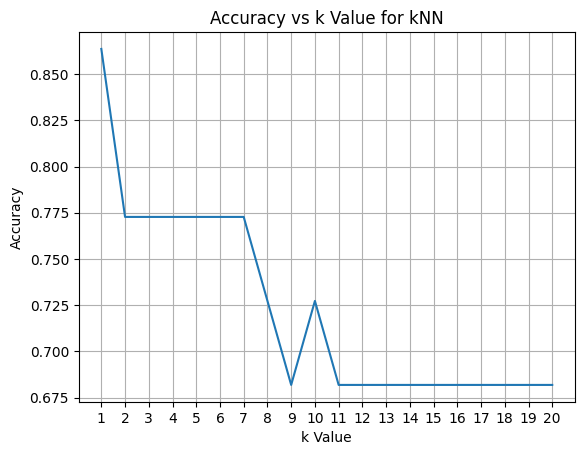

In [80]:
## test with different k values
accuracy_scores = []
k_values = range(1, 21)  ## k from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k Value for kNN')
plt.xticks(k_values)
plt.grid()
plt.show()

**Part 2** - In-Depth Experimentation with the kNN Algorithm


1.   *Parameter Experimentation*
2.   **--> Train-Test Split Analysis**
3.   *k-Fold Cross-Validation*



In [72]:
## define train-test split ratios to test
split_ratios = [0.2, 0.3, 0.1]  ## corresponds to 80/20, 70/30, and 90/10
results = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)  ## use k=5 as an example
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[ratio] = accuracy
    print(f"Accuracy for train/test split ratio {1 - ratio}/{ratio}: {accuracy:.2f}")

print("Accuracy for different train/test splits:")
print(results)

Accuracy for train/test split ratio 0.8/0.2: 0.67
Accuracy for train/test split ratio 0.7/0.3: 0.67
Accuracy for train/test split ratio 0.9/0.1: 0.77
Accuracy for different train/test splits:
{0.2: 0.6744186046511628, 0.3: 0.671875, 0.1: 0.7727272727272727}


**Part 2** - In-Depth Experimentation with the kNN Algorithm


1.   *Parameter Experimentation*
2.   *--> Train-Test Split Analysis*
3.   **--> k-Fold Cross-Validation**



In [71]:
## initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as an example

## perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation

print(f"Cross-validation scores for k=5: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

Cross-validation scores for k=5: [0.48837209 0.62790698 0.60465116 0.57142857 0.73809524]
Mean cross-validation accuracy: 0.61
